# README

- **Author**: `方珮潔`
- **Created At**: `2025-10-12`
- **Last Modified At**: `2025-10-26`

---

## What does this file do?

程式根據以下步驟生成「探討所有遊戲折扣時點的影響因子」所需數據：
- `資料檢查與前處理`
  - `前置作業`
  - `結合兩張資料表`
  - `資料表形狀與前五列`
  - `資料型態與缺失值`
  - `數值欄位分佈`
  - `類別欄位分佈`
- `進階欄位生成`
  - `折扣與否`
  - `遊戲年齡`
  - `累積評價正面率`
  - `是否為平台促銷期`
  - `玩家數、追蹤人數、正面率的指定期間增長率`
  - `距最新 DLC、續作推出幾天`
  - `欄位生成結果統整`
- `結果檔案整理`
  - `刪除不需欄`
  - `欄位順序調整`
  - `篩選所需時間範圍`
  - `欄位型態調整`
  - `結果檔案觀察`
- `輸出結果檔案：discount-timing-DE.ipynb`

---

## What does this file take?

- **Source Data Sets**:  
  1. `all_games_merged.csv` 
    - Description: `來自 merge-data-processing-code.ipynb 處理完的資料，欄位包含：` 
      - Players
      - Date
      - Final price
      - Followers
      - Positive reviews
      - Negative reviews
      - GameID
      - ReleaseDate
      - OriginPrice
      - Type
      - MultiPlayer
      - Publisher
      - ConstantDiscount
  2. `release_events_all_games.csv`
    - Description: `額外整理每個遊戲推出新 DLC 及續作的時間點，欄位包含：`
      - GameID
      - Date
      - Has_DLC
      - Has_Sequel
---

## What does this file output?

- `processed_data.csv`  
  - Description: `包含所有 DA 所需欄位的完整資料表，欄位包含：`
    - Date
    - GameID
    - Type
    - MultiPlayer
    - Publisher
    - ConstantDiscount
    - Age
    - DiscountRate
    - AccumulatedPositiveRate
    - SalePeriod
    - PlayerGrowthRate1W
    - PlayerGrowthRate2W
    - PlayerGrowthRate1M
    - FollowersGrowthRate1W
    - FollowersGrowthRate2W
    - FollowersGrowthRate1M
    - PositiveRateGrowthRate1W
    - PositiveRateGrowthRate2W
    - PositiveRateGrowthRate1M
    - DLC_since_last_discount
    - Sequel_since_last_discount



# 程式碼

## 資料檢查與前處理

### 前置作業

In [1]:
# 後續所需套件引入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/peijiefang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 顯示所有欄與列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 增加螢幕寬度
pd.set_option('display.width', 2000)

# 若欄位名稱太長也不截斷
pd.set_option('display.max_colwidth', None)

In [3]:
# 地端資料表讀取
all_games_df = pd.read_csv("/Users/peijiefang/Downloads/data analysis project/all_games_merged.csv") 
release_events_df = pd.read_csv("/Users/peijiefang/Downloads/data analysis project/release_events_all_games.csv")

### 結合兩張資料表

In [4]:
merged_df = pd.merge(all_games_df, release_events_df, on=['GameID', 'Date'], how='left')

# 把缺失值補成 0
merged_df['Has_DLC'] = merged_df['Has_DLC'].fillna(0)
merged_df['Has_Sequel'] = merged_df['Has_Sequel'].fillna(0)

df = merged_df.copy()

### 資料表形狀與前五列

In [5]:
# 資料表形狀
print("\n--- Shape ---")
print(df.shape)

# 資料表前五列
print("\n--- Head 5 rows ---")
df.head()


--- Shape ---
(29247, 15)

--- Head 5 rows ---


,Players,Date,Final price,Followers,Positive reviews,Negative reviews,GameID,ReleaseDate,OriginPrice,Type,MultiPlayer,Publisher,ConstantDiscount,Has_DLC,Has_Sequel
0,122237.0,2023-01-01,120.0,927415,587533,-11350,431960,2018-11-16,120,Mature,0,Wallpaper Engine Team,1,0.0,0.0
1,130721.0,2023-01-02,120.0,928018,588748,-11353,431960,2018-11-16,120,Mature,0,Wallpaper Engine Team,1,0.0,0.0
2,129769.0,2023-01-03,120.0,928691,589351,-11368,431960,2018-11-16,120,Mature,0,Wallpaper Engine Team,1,0.0,0.0
3,129385.0,2023-01-04,120.0,929333,589351,-11368,431960,2018-11-16,120,Mature,0,Wallpaper Engine Team,1,0.0,0.0
4,129933.0,2023-01-05,120.0,930028,589351,-11368,431960,2018-11-16,120,Mature,0,Wallpaper Engine Team,1,0.0,0.0


### 資料型態與缺失值

In [6]:
# 資料型態與缺失狀況
print("\n--- Data information ---")
df.info()


--- Data information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29247 entries, 0 to 29246
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Players           29065 non-null  float64
 1   Date              29247 non-null  object 
 2   Final price       29247 non-null  float64
 3   Followers         29247 non-null  int64  
 4   Positive reviews  29247 non-null  int64  
 5   Negative reviews  29247 non-null  int64  
 6   GameID            29247 non-null  int64  
 7   ReleaseDate       29247 non-null  object 
 8   OriginPrice       29247 non-null  int64  
 9   Type              29247 non-null  object 
 10  MultiPlayer       29247 non-null  int64  
 11  Publisher         29247 non-null  object 
 12  ConstantDiscount  29247 non-null  int64  
 13  Has_DLC           29247 non-null  float64
 14  Has_Sequel        29247 non-null  float64
dtypes: float64(4), int64(7), object(4)
memory usage: 3.3+ MB


In [7]:
# 特定欄位資料型態轉換
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df['GameID'] = df['GameID'].astype(str)

# 剩餘數值欄位轉為 float 或 int
cat_cols = df.select_dtypes(include=['object', 'category']).columns
exclude_cols = list(cat_cols) + ['Date', 'ReleaseDate']
num_cols = df.columns.difference(exclude_cols)
for col in num_cols:
    try:
        df[col] = df[col].astype(float)
    except Exception as e:
        print(f"欄位 {col} 轉換失敗: {e}")
df['MultiPlayer'] = df['MultiPlayer'].astype(int)
df['ConstantDiscount'] = df['ConstantDiscount'].astype(int)
df['Has_DLC'] = df['Has_DLC'].astype(int)
df['Has_Sequel'] = df['Has_Sequel'].astype(float)

# 驗證型態轉換結果
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29247 entries, 0 to 29246
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Players           29065 non-null  float64       
 1   Date              29247 non-null  datetime64[ns]
 2   Final price       29247 non-null  float64       
 3   Followers         29247 non-null  float64       
 4   Positive reviews  29247 non-null  float64       
 5   Negative reviews  29247 non-null  float64       
 6   GameID            29247 non-null  object        
 7   ReleaseDate       29247 non-null  datetime64[ns]
 8   OriginPrice       29247 non-null  float64       
 9   Type              29247 non-null  object        
 10  MultiPlayer       29247 non-null  int64         
 11  Publisher         29247 non-null  object        
 12  ConstantDiscount  29247 non-null  int64         
 13  Has_DLC           29247 non-null  int64         
 14  Has_Sequel        2924

In [9]:
# 設定成索引
df = df.set_index('Date')

# 缺失值補值
df['Players'] = df['Players'].interpolate(method='time')

# 後續還要用 Date 當欄位
df = df.reset_index()

In [10]:
# 再次檢查缺失狀況
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29247 entries, 0 to 29246
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              29247 non-null  datetime64[ns]
 1   Players           29247 non-null  float64       
 2   Final price       29247 non-null  float64       
 3   Followers         29247 non-null  float64       
 4   Positive reviews  29247 non-null  float64       
 5   Negative reviews  29247 non-null  float64       
 6   GameID            29247 non-null  object        
 7   ReleaseDate       29247 non-null  datetime64[ns]
 8   OriginPrice       29247 non-null  float64       
 9   Type              29247 non-null  object        
 10  MultiPlayer       29247 non-null  int64         
 11  Publisher         29247 non-null  object        
 12  ConstantDiscount  29247 non-null  int64         
 13  Has_DLC           29247 non-null  int64         
 14  Has_Sequel        2924

### 數值欄位分佈

In [11]:
print("\n--- Numerical Summary ---")
df[num_cols].describe().T


--- Numerical Summary ---


,count,mean,std,min,25%,50%,75%,max
ConstantDiscount,29247.0,0.200089,0.400073,0.0,0.0,0.0,0.0,1.0
Final price,29247.0,433.789243,358.203761,0.0,268.0,328.0,468.0,1599.0
Followers,29247.0,506910.112388,521878.279528,580.0,196029.0,338690.0,598195.5,2744924.0
Has_DLC,29247.0,0.000650,0.025480,0.0,0.0,0.0,0.0,1.0
Has_Sequel,29247.0,0.000137,0.011694,0.0,0.0,0.0,0.0,1.0
MultiPlayer,29247.0,0.433344,0.495545,0.0,0.0,0.0,1.0,1.0
Negative reviews,29247.0,-17960.842924,33303.279889,-174531.0,-14580.5,-7823.0,-3874.5,-79.0
OriginPrice,29247.0,439.287448,360.162978,22.0,268.0,378.0,468.0,1599.0
Players,29247.0,18560.914624,27167.030722,1.0,4137.0,7749.0,21110.5,274526.0
Positive reviews,29247.0,242669.268746,255772.915602,113.0,64977.0,135729.0,303938.0,1138939.0


### 類別欄位分佈


--- Categorical Summary ---

Value counts for GameID:
GameID
814380     978
477160     976
588650     976
381210     976
431730     975
244850     975
376210     975
548430     975
242760     975
413150     975
703080     975
1145360    975
431960     975
880940     975
4000       975
108600     975
233860     975
294100     975
367520     975
1091500    975
644930     975
331790     974
10         974
457140     974
244210     974
323190     974
582660     974
3590       974
881100     974
423710     974
Name: count, dtype: int64


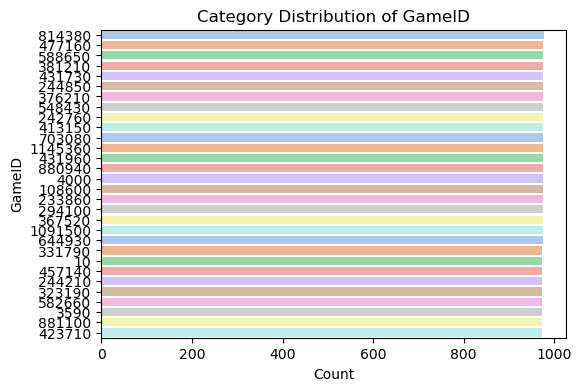


Value counts for Type:
Type
Sandbox                      2924
Survival                     1950
Colony Sim                   1949
RPG                          1948
Souls-like                    978
Horror                        976
Co-op                         976
Adventure                     976
Mature                        975
Open World Survival Craft     975
Management                    975
Base Building                 975
Pixel Graphics                975
Dwarf                         975
Action Roguelike              975
Farming Sim                   975
Funny                         975
Metroidvania                  975
Cyberpunk                     975
Open World                    975
Action                        974
Racing                        974
City Builder                  974
Tower Defense                 974
Physics                       974
Name: count, dtype: int64


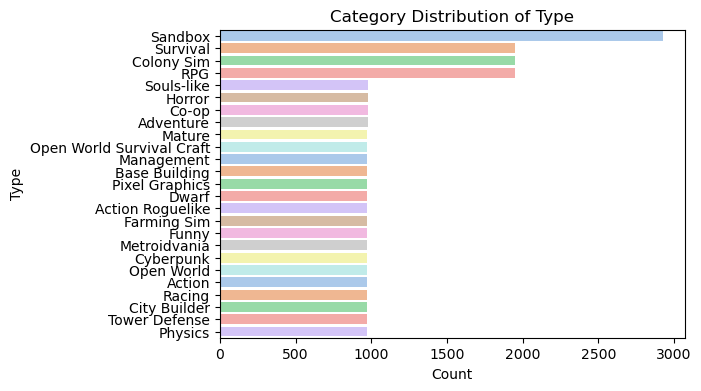


Value counts for Publisher:
Publisher
Valve                                                                             1949
New Reality Games                                                                 1948
Activision (Excluding Japan and Asia), FromSoftware, Inc. (Japan), 方块游戏 (Asia)     978
Behaviour Interactive Inc.                                                         976
Curve Games                                                                        976
Motion Twin                                                                        976
Wallpaper Engine Team                                                              975
Endnight Games Ltd                                                                 975
Frontier Developments                                                              975
Afterthought LLC                                                                   975
Numantian Games                                                                    975
Igar

/Users/peijiefang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/peijiefang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22359 (\N{CJK UNIFIED IDEOGRAPH-5757}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/peijiefang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/peijiefang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25103 (\N{CJK UNIFIED IDEOGRAPH-620F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


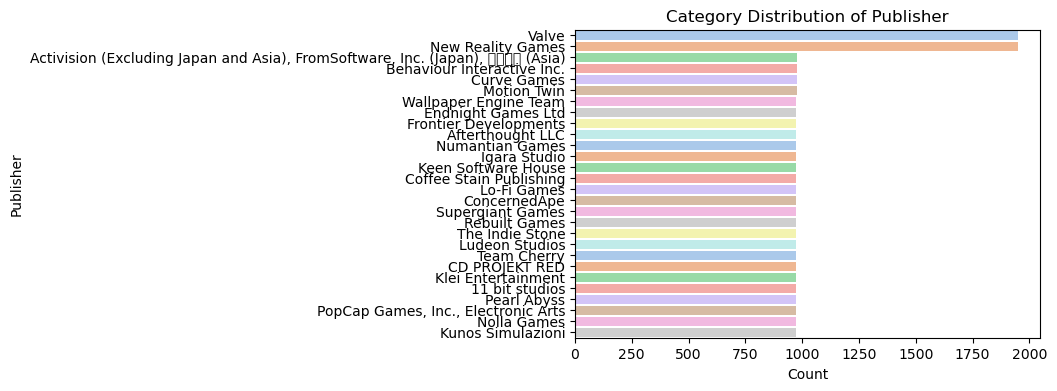

In [12]:
print("\n--- Categorical Summary ---")
for col in cat_cols[:]:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")
    plt.title(f"Category Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

In [13]:
cleaned_df = df.copy()

## 進階欄位生成

### 折扣與否

In [14]:
cleaned_df['DiscountRate'] = (cleaned_df['OriginPrice'] - cleaned_df['Final price']) / cleaned_df['OriginPrice']
cleaned_df['DiscountOrNot'] = np.where(cleaned_df['DiscountRate'] != 0, 1, 0)

### 遊戲年齡

In [15]:
# 遊戲年齡（年） = 當下日期 - 推出日期
cleaned_df['Age'] = (cleaned_df['Date'] - cleaned_df['ReleaseDate']).dt.days / 365

### 累積評價正面率

In [16]:
cleaned_df['AccumulatedPositiveRate'] = cleaned_df['Positive reviews'] / (cleaned_df['Positive reviews'] - cleaned_df['Negative reviews'])

# cleaned_df['Positive reviews on that day'] = cleaned_df['Positive reviews'] - cleaned_df['Positive reviews'].shift(1)
# cleaned_df['Negative reviews on that day'] = cleaned_df['Negative reviews'] - cleaned_df['Negative reviews'].shift(1)

### 是否為平台促銷期

In [17]:
# 建立促銷期間表
steam_sales = pd.DataFrame({
    'sale_name': [
        'Summer Sale 2023', 'Halloween Sale 2023', 'Autumn Sale 2023', 'Winter Sale 2023',
        'Lunar New Year Sale 2024', 'Spring Sale 2024', 'Summer Sale 2024', 'Autumn Sale 2024', 'Winter Sale 2024',
        'Lunar New Year Sale 2025', 'Spring Sale 2025'
    ],
    'start_date': pd.to_datetime([
        '2023-06-29', '2023-10-26', '2023-11-21', '2023-12-21',
        '2024-02-06', '2024-03-14', '2024-06-27', '2024-11-27', '2024-12-19',
        '2025-01-26', '2025-03-13'
    ]),
    'end_date': pd.to_datetime([
        '2023-07-13', '2023-11-02', '2023-11-28', '2024-01-04',
        '2024-02-15', '2024-03-21', '2024-07-11', '2025-12-04', '2025-01-02',
        '2025-02-09', '2025-03-20'
    ])
})

# 新增欄位，預設為 0
cleaned_df['SalePeriod'] = 0

# 逐一比對促銷期間
for _, row in steam_sales.iterrows():
    mask = (cleaned_df['Date'] >= row['start_date']) & (cleaned_df['Date'] <= row['end_date'])
    cleaned_df.loc[mask, 'SalePeriod'] = 1

### 玩家數、追蹤人數、正面率的指定期間移動平均增長率

In [18]:
def process_all_games(df):
    def process_game(group):
        group = group.sort_values('Date')
        group.set_index('Date', inplace=True)
        
        # players 的移動平均
        group['AvgPlayers1W'] = group['Players'].rolling(window='7D').mean()
        group['AvgPlayers2W'] = group['Players'].rolling(window='14D').mean()
        group['AvgPlayers1M'] = group['Players'].rolling(window='30D').mean()
        # players MA 增長率
        group['PlayerGrowthRate1W'] = group['AvgPlayers1W'].pct_change(periods=7)
        group['PlayerGrowthRate2W'] = group['AvgPlayers2W'].pct_change(periods=14)
        group['PlayerGrowthRate1M'] = group['AvgPlayers1M'].pct_change(periods=30)  

        # followers 增長率
        group['FollowersGrowthRate1W'] = group['Followers'].pct_change(periods=7)
        group['FollowersGrowthRate2W'] = group['Followers'].pct_change(periods=14)
        group['FollowersGrowthRate1M'] = group['Followers'].pct_change(periods=30)

        group['PositiveRateGrowthRate1W'] = group['AccumulatedPositiveRate'].pct_change(periods=7)
        group['PositiveRateGrowthRate2W'] = group['AccumulatedPositiveRate'].pct_change(periods=14)
        group['PositiveRateGrowthRate1M'] = group['AccumulatedPositiveRate'].pct_change(periods=30)

        # positive reviews 
        # group['PositiveReview1W'] = group['Positive reviews on that day'].rolling(window='7D').sum()
        # group['NegativeReview1W'] = group['Negative reviews on that day'].rolling(window='7D').sum()
        # group['PositiveReview2W'] = group['Positive reviews on that day'].rolling(window='14D').sum()
        # group['NegativeReview2W'] = group['Negative reviews on that day'].rolling(window='14D').sum()
        # group['PositiveReview1M'] = group['Positive reviews on that day'].rolling(window='30D').sum()
        # group['NegativeReview1M'] = group['Negative reviews on that day'].rolling(window='30D').sum()
        # positive reviews 的移動平均
        # group['PositiveRate1W'] = np.where(
            # group['PositiveReview1W'] - group['NegativeReview1W'] == 0,
            # 0, 
            # group['PositiveReview1W'] / (group['PositiveReview1W'] - group['NegativeReview1W'])
        # )       
        # group['PositiveRate2W'] = np.where(
            # group['PositiveReview2W'] - group['NegativeReview2W'] == 0,
            # 0, 
            # group['PositiveReview2W'] / (group['PositiveReview2W'] - group['NegativeReview2W'])
        # )
        # group['PositiveRate1M'] = np.where(
            # group['PositiveReview1M'] - group['NegativeReview1M'] == 0,
            # 0, 
            # group['PositiveReview1M'] / (group['PositiveReview1M'] - group['NegativeReview1M'])
        # )
        # positive reviews MA 增長率
        # group['PositiveRateGrowthRate1W'] = group['PositiveRate1W'].pct_change(periods=7)
        # group['PositiveRateGrowthRate2W'] = group['PositiveRate2W'].pct_change(periods=14)
        # group['PositiveRateGrowthRate1M'] = group['PositiveRate1M'].pct_change(periods=30)

        return group

    result = cleaned_df.groupby('GameID', group_keys=False).apply(process_game).reset_index()
    return result

In [19]:
gen_cols_df = process_all_games(cleaned_df)

/var/folders/hj/kj1rrf6n1977cn22dk_rt5lw0000gn/T/ipykernel_25090/3684565000.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = cleaned_df.groupby('GameID', group_keys=False).apply(process_game).reset_index()


### 距最新 DLC、續作推出幾天

In [20]:
# 依遊戲與日期排序
gen_cols_df = gen_cols_df.sort_values(['GameID', 'Date']).reset_index(drop=True)

# 建立每個遊戲的「最近 DLC 日期」欄
gen_cols_df['LastDLCDate'] = (
    gen_cols_df.groupby('GameID', group_keys=False)
      .apply(lambda g: g.assign(
          LastDLCDate=g['Date'].where(g['Has_DLC'] == 1).ffill()
      ))
      ['LastDLCDate']
)

# 建立每個遊戲的「最近 Sequel 日期」欄
gen_cols_df['LastSequelDate'] = (
    gen_cols_df.groupby('GameID', group_keys=False)
      .apply(lambda g: g.assign(
          LastSequelDate=g['Date'].where(g['Has_Sequel'] == 1).ffill()
      ))
      ['LastSequelDate']
)

# 計算距離最近 DLC / Sequel 的天數
gen_cols_df['DaysSinceLastDLC'] = (gen_cols_df['Date'] - gen_cols_df['LastDLCDate']).dt.days
gen_cols_df['DaysSinceLastSequel'] = (gen_cols_df['Date'] - gen_cols_df['LastSequelDate']).dt.days

# ✅ 修正：在還沒出現過 DLC 前的期間以 -1 標記
# （也就是該 GameID 在當前日期前都沒有 Has_DLC == 1）
gen_cols_df.loc[
    gen_cols_df.groupby('GameID')['Has_DLC'].cumsum() == 0, 
    'DaysSinceLastDLC'
] = -1

# 同理可選擇是否對 Sequel 做一樣處理（可視需求）
gen_cols_df.loc[
    gen_cols_df.groupby('GameID')['Has_Sequel'].cumsum() == 0, 
    'DaysSinceLastSequel'
] = -1

# 複製結果
df_result = gen_cols_df.copy()

/var/folders/hj/kj1rrf6n1977cn22dk_rt5lw0000gn/T/ipykernel_25090/2570924730.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(
/var/folders/hj/kj1rrf6n1977cn22dk_rt5lw0000gn/T/ipykernel_25090/2570924730.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(


### 欄位生成結果統整

In [21]:
# 確認欄位生成狀況
df_result.head()

,Date,Players,Final price,Followers,Positive reviews,Negative reviews,GameID,ReleaseDate,OriginPrice,Type,MultiPlayer,Publisher,ConstantDiscount,Has_DLC,Has_Sequel,DiscountRate,DiscountOrNot,Age,AccumulatedPositiveRate,SalePeriod,AvgPlayers1W,AvgPlayers2W,AvgPlayers1M,PlayerGrowthRate1W,PlayerGrowthRate2W,PlayerGrowthRate1M,FollowersGrowthRate1W,FollowersGrowthRate2W,FollowersGrowthRate1M,PositiveRateGrowthRate1W,PositiveRateGrowthRate2W,PositiveRateGrowthRate1M,LastDLCDate,LastSequelDate,DaysSinceLastDLC,DaysSinceLastSequel
0,2023-01-01,14817.0,186.0,194409.0,207951.0,-5310.0,10,2000-11-01,186.0,Action,1,Valve,0,0,0.0,0.0,0,22.180822,0.975101,0,14817.000000,14817.000000,14817.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-1.0,-1.0
1,2023-01-02,16200.0,186.0,194452.0,207951.0,-5310.0,10,2000-11-01,186.0,Action,1,Valve,0,0,0.0,0.0,0,22.183562,0.975101,0,15508.500000,15508.500000,15508.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-1.0,-1.0
2,2023-01-03,16339.0,186.0,194501.0,208150.0,-5312.0,10,2000-11-01,186.0,Action,1,Valve,0,0,0.0,0.0,0,22.186301,0.975115,0,15785.333333,15785.333333,15785.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-1.0,-1.0
3,2023-01-04,16518.0,186.0,194549.0,208247.0,-5315.0,10,2000-11-01,186.0,Action,1,Valve,0,0,0.0,0.0,0,22.189041,0.975113,0,15968.500000,15968.500000,15968.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-1.0,-1.0
4,2023-01-05,16656.0,186.0,194602.0,208327.0,-5316.0,10,2000-11-01,186.0,Action,1,Valve,0,0,0.0,0.0,0,22.191781,0.975117,0,16106.000000,16106.000000,16106.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,-1.0,-1.0


In [22]:
# 確認總欄位數
df_result.columns

Index(['Date', 'Players', 'Final price', 'Followers', 'Positive reviews', 'Negative reviews', 'GameID', 'ReleaseDate', 'OriginPrice', 'Type', 'MultiPlayer', 'Publisher', 'ConstantDiscount', 'Has_DLC', 'Has_Sequel', 'DiscountRate', 'DiscountOrNot', 'Age', 'AccumulatedPositiveRate', 'SalePeriod', 'AvgPlayers1W', 'AvgPlayers2W', 'AvgPlayers1M', 'PlayerGrowthRate1W', 'PlayerGrowthRate2W', 'PlayerGrowthRate1M', 'FollowersGrowthRate1W', 'FollowersGrowthRate2W', 'FollowersGrowthRate1M', 'PositiveRateGrowthRate1W', 'PositiveRateGrowthRate2W', 'PositiveRateGrowthRate1M', 'LastDLCDate', 'LastSequelDate', 'DaysSinceLastDLC', 'DaysSinceLastSequel'], dtype='object')

In [23]:
# 確認數值欄位分布
df_result.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29247,2024-05-01 17:37:02.627961856,2023-01-01 00:00:00,2023-09-01 00:00:00,2024-05-02 00:00:00,2024-12-31 00:00:00,2025-08-31 00:00:00,NaN
Players,29247.0,18560.914624,1.0,4137.0,7749.0,21110.5,274526.0,27167.030722
Final price,29247.0,433.789243,0.0,268.0,328.0,468.0,1599.0,358.203761
Followers,29247.0,506910.112388,580.0,196029.0,338690.0,598195.5,2744924.0,521878.279528
Positive reviews,29247.0,242669.268746,113.0,64977.0,135729.0,303938.0,1138939.0,255772.915602
Negative reviews,29247.0,-17960.842924,-174531.0,-14580.5,-7823.0,-3874.5,-79.0,33303.279889
ReleaseDate,29247,2016-10-20 03:12:01.181659392,2000-11-01 00:00:00,2016-02-22 00:00:00,2018-04-30 00:00:00,2019-03-22 00:00:00,2020-12-10 00:00:00,NaN
OriginPrice,29247.0,439.287448,22.0,268.0,378.0,468.0,1599.0,360.162978
MultiPlayer,29247.0,0.433344,0.0,0.0,0.0,1.0,1.0,0.495545
ConstantDiscount,29247.0,0.200089,0.0,0.0,0.0,0.0,1.0,0.400073


## 結果檔案整理

### 刪除不需欄

In [24]:
df_result.drop(columns=['DiscountRate', 'Players', 'Final price', 'Followers', 'Positive reviews', 'Negative reviews', 'ReleaseDate', 'OriginPrice', 'AvgPlayers1W', 'AvgPlayers2W', 'AvgPlayers1M', 'Has_DLC', 'Has_Sequel', 'LastDLCDate', 'LastSequelDate'], inplace=True)

### 欄位順序調整

In [25]:
sorted_cols = ['Date', 'GameID', 'Type', 'MultiPlayer', 'Publisher', 'ConstantDiscount', 'DiscountOrNot', 'Age', 'AccumulatedPositiveRate', 'SalePeriod', 'PlayerGrowthRate1W', 'PlayerGrowthRate2W', 'PlayerGrowthRate1M', 'FollowersGrowthRate1W', 'FollowersGrowthRate2W', 'FollowersGrowthRate1M', 'PositiveRateGrowthRate1W', 'PositiveRateGrowthRate2W', 'PositiveRateGrowthRate1M', 'DaysSinceLastDLC', 'DaysSinceLastSequel']
df_result = df_result.reindex(columns=sorted_cols)

### 篩選所需時間範圍

In [26]:
start_date = '2023-05-01'
end_date = '2025-08-31'

df_result = df_result[(df_result['Date'] >= start_date) & (df_result['Date'] <= end_date)]

### 欄位型態調整

In [27]:
df_result['DaysSinceLastDLC'] = df_result['DaysSinceLastDLC'].astype('Int64')
df_result['DaysSinceLastSequel'] = df_result['DaysSinceLastSequel'].astype('Int64')

### 結果檔案觀察

In [28]:
df_result.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,21938,2024-04-29 23:40:57.872185344,2023-05-01 00:00:00,2023-10-30 00:00:00,2024-04-30 00:00:00,2024-10-30 00:00:00,2025-04-30 00:00:00,NaN
MultiPlayer,21938.0,0.433312,0.0,0.0,0.0,1.0,1.0,0.495544
ConstantDiscount,21938.0,0.200064,0.0,0.0,0.0,0.0,1.0,0.400057
DiscountOrNot,21938.0,0.020968,0.0,0.0,0.0,0.0,1.0,0.143281
Age,21938.0,7.531344,2.389041,4.920548,6.323288,8.465753,24.509589,4.307168
AccumulatedPositiveRate,21938.0,0.901283,0.425325,0.884299,0.95284,0.971938,0.992973,0.119497
SalePeriod,21938.0,0.320221,0.0,0.0,0.0,1.0,1.0,0.466572
PlayerGrowthRate1W,21938.0,34.823854,-0.999953,-0.069164,-0.014711,0.039745,24563.428571,592.169355
PlayerGrowthRate2W,21938.0,9.693256,-0.999902,-0.095771,-0.015546,0.070855,13870.45,216.482984
PlayerGrowthRate1M,21938.0,0.694885,-0.999799,-0.117624,-0.009335,0.10166,902.615385,14.708579


In [29]:
df_result.head()

,Date,GameID,Type,MultiPlayer,Publisher,ConstantDiscount,DiscountOrNot,Age,AccumulatedPositiveRate,SalePeriod,PlayerGrowthRate1W,PlayerGrowthRate2W,PlayerGrowthRate1M,FollowersGrowthRate1W,FollowersGrowthRate2W,FollowersGrowthRate1M,PositiveRateGrowthRate1W,PositiveRateGrowthRate2W,PositiveRateGrowthRate1M,DaysSinceLastDLC,DaysSinceLastSequel
120,2023-05-01,10,Action,1,Valve,0,0,22.509589,0.975206,0,-0.010623,-0.055961,-0.077896,0.000788,0.001710,0.003889,0.000012,-0.000014,1.098178e-05,-1,-1
121,2023-05-02,10,Action,1,Valve,0,0,22.512329,0.975184,0,-0.007766,-0.052334,-0.085461,0.000783,0.001730,0.003913,-0.000010,-0.000036,-4.698912e-07,-1,-1
122,2023-05-03,10,Action,1,Valve,0,0,22.515068,0.975189,0,-0.006222,-0.052562,-0.087459,0.000814,0.001735,0.003979,-0.000011,-0.000041,-8.082766e-07,-1,-1
123,2023-05-04,10,Action,1,Valve,0,0,22.517808,0.975183,0,-0.006541,-0.053507,-0.090651,0.000829,0.001719,0.004101,-0.000012,-0.000050,-2.450820e-05,-1,-1
124,2023-05-05,10,Action,1,Valve,0,0,22.520548,0.975170,0,-0.005006,-0.048250,-0.091779,0.000884,0.001674,0.003912,-0.000023,-0.000053,-3.754777e-05,-1,-1


In [30]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21938 entries, 120 to 29123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      21938 non-null  datetime64[ns]
 1   GameID                    21938 non-null  object        
 2   Type                      21938 non-null  object        
 3   MultiPlayer               21938 non-null  int64         
 4   Publisher                 21938 non-null  object        
 5   ConstantDiscount          21938 non-null  int64         
 6   DiscountOrNot             21938 non-null  int64         
 7   Age                       21938 non-null  float64       
 8   AccumulatedPositiveRate   21938 non-null  float64       
 9   SalePeriod                21938 non-null  int64         
 10  PlayerGrowthRate1W        21938 non-null  float64       
 11  PlayerGrowthRate2W        21938 non-null  float64       
 12  PlayerGrowthRate1M   

## 輸出結果檔案

In [31]:
df_result.to_csv('/Users/peijiefang/Downloads/data analysis project/discount-timing-DE.csv', index=False, encoding='utf-8-sig')